
# Loading Packages and Data

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
train_data = pd.read_csv("/content/Train.csv")
test_data = pd.read_csv("/content/Test.csv")

In [49]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [51]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Handling missing values

In [52]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There is two columns Item_Weight and Outlet_Size have missing values so we need to impute them using mean and mode values.

In [53]:
# Calculate the mean of 'Item_Weight'
mean_item_weight = train_data['Item_Weight'].mean()

# Fill null values with the mean value
train_data['Item_Weight'].fillna(mean_item_weight, inplace=True)

# Calculate the mode of 'Outlet_Size'
mode_outlet_size = train_data['Outlet_Size'].mode()[0]

# Fill null values with the mode value
train_data['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

In [54]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Outlier detection and handling

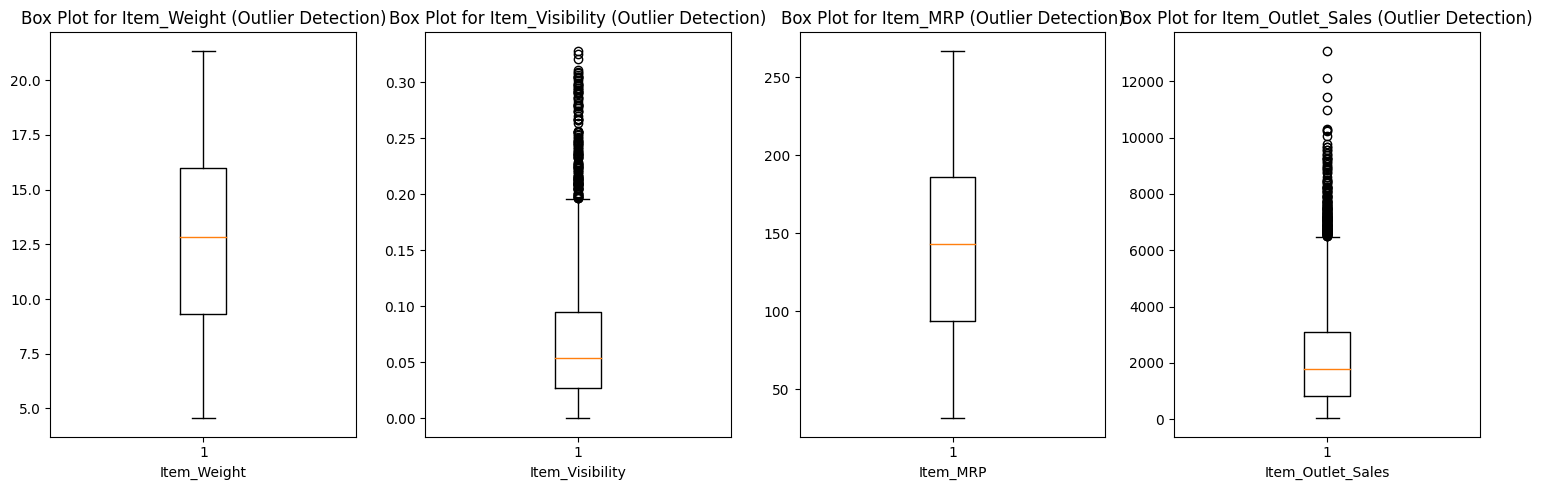

In [55]:
# Define the features  want to create box plots for
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Loop through each feature and create box plots
for i, feature in enumerate(features):
    axes[i].boxplot(train_data[feature], vert=True)
    axes[i].set_xlabel(feature)
    axes[i].set_title(f'Box Plot for {feature} (Outlier Detection)')

plt.tight_layout()
plt.show()


From the box plot we can see that olny two columns 'Item_Visibility'and 'Item_Outlet_Sales' have outliers

In [56]:
# Define the two features for outlier detection and removal
features_to_process = ['Item_Visibility', 'Item_Outlet_Sales']

# Loop through each feature
for feature in features_to_process:
    # Calculate the IQR
    Q1 = train_data[feature].quantile(0.25)
    Q3 = train_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with lower or upper bound
    train_data[feature] = train_data[feature].clip(lower=lower_bound, upper=upper_bound)

# Now, train_data contains the outliers replaced with the lower and upper bounds


In [57]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [58]:
# Replace values in the 'Item_Fat_Content' column
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})


In [59]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [60]:
train_data.duplicated().sum()

0

# Exploratory Data Analysis (eda)

**Univariate** **Analysis**

In [61]:
# Select numerical columns
numerical_columns = train_data.select_dtypes(include=[np.number])

# Select categorical columns
categorical_columns = train_data.select_dtypes(exclude=[np.number])

numerical_columns

In [62]:
numerical_columns.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

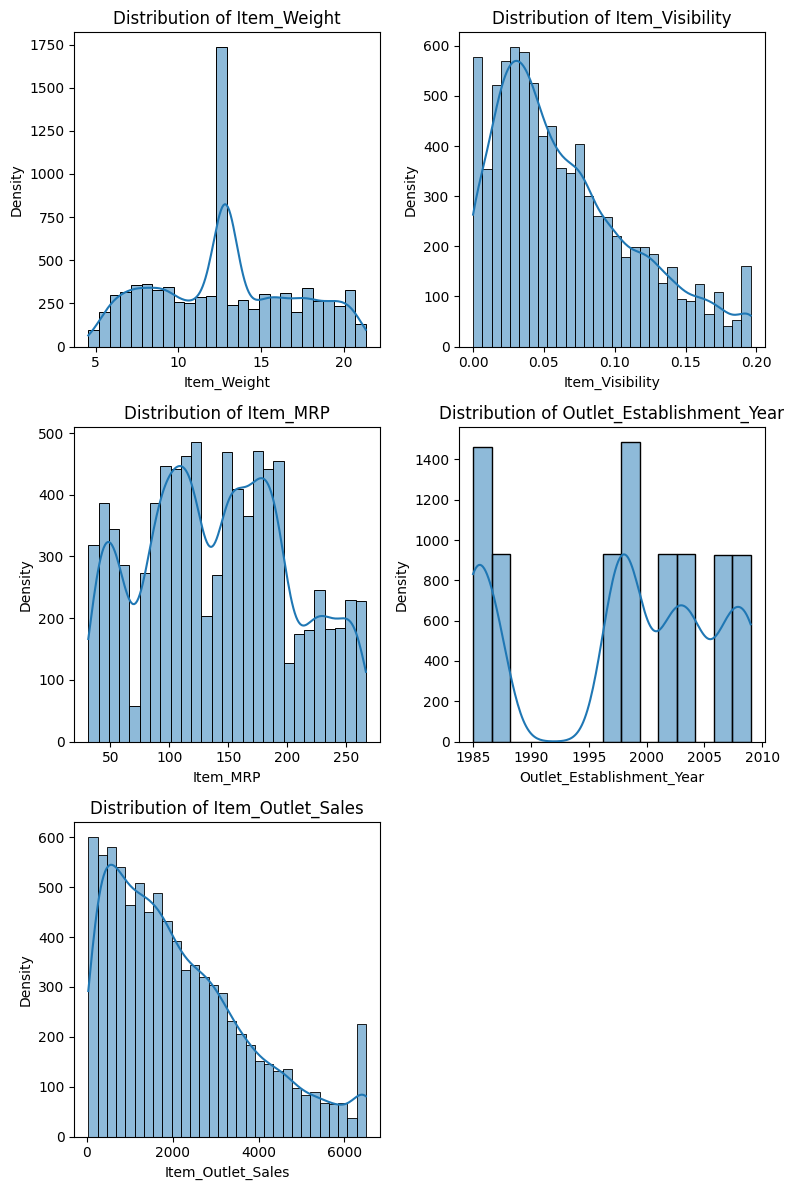

In [63]:
# Assuming 'numerical_columns' is  DataFrame containing numerical features

# Calculate the number of rows and columns for the subplots grid
num_features = len(numerical_columns.columns)
num_rows = (num_features + 1) // 2  # Two columns per row

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Loop through each numerical feature and create distribution plots (displots) within subplots
for i, column in enumerate(numerical_columns.columns):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    sns.histplot(numerical_columns[column], kde=True, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {column}')

# If there is an odd number of features, remove the last empty subplot
if num_features % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()


categorical_columns

In [64]:
categorical_columns.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [65]:
categorical_columns = categorical_columns.drop(['Item_Identifier'], axis = 1)
categorical_columns.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

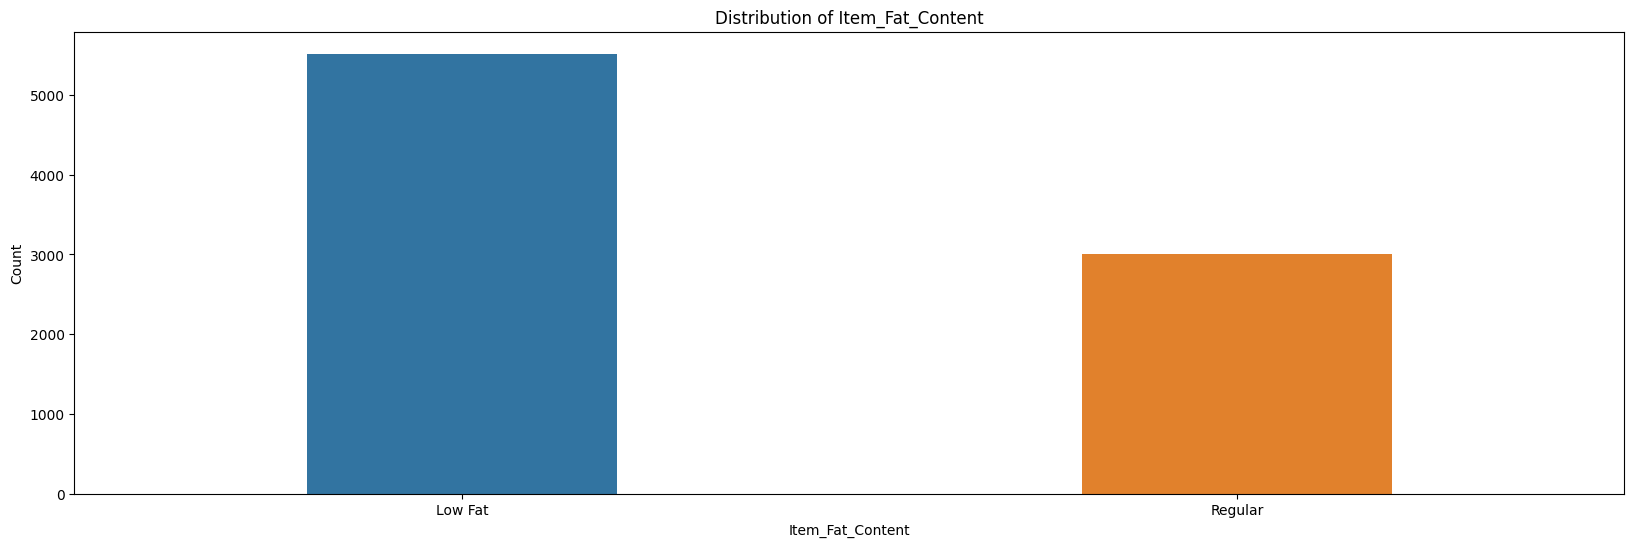

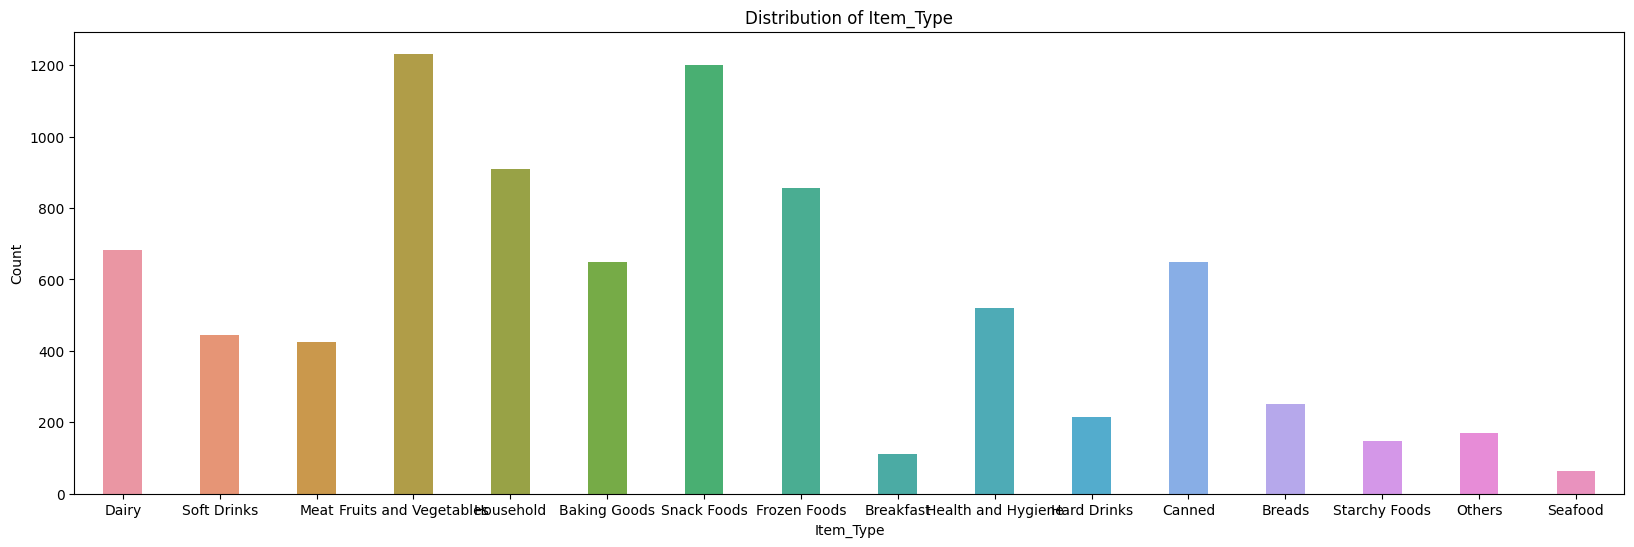

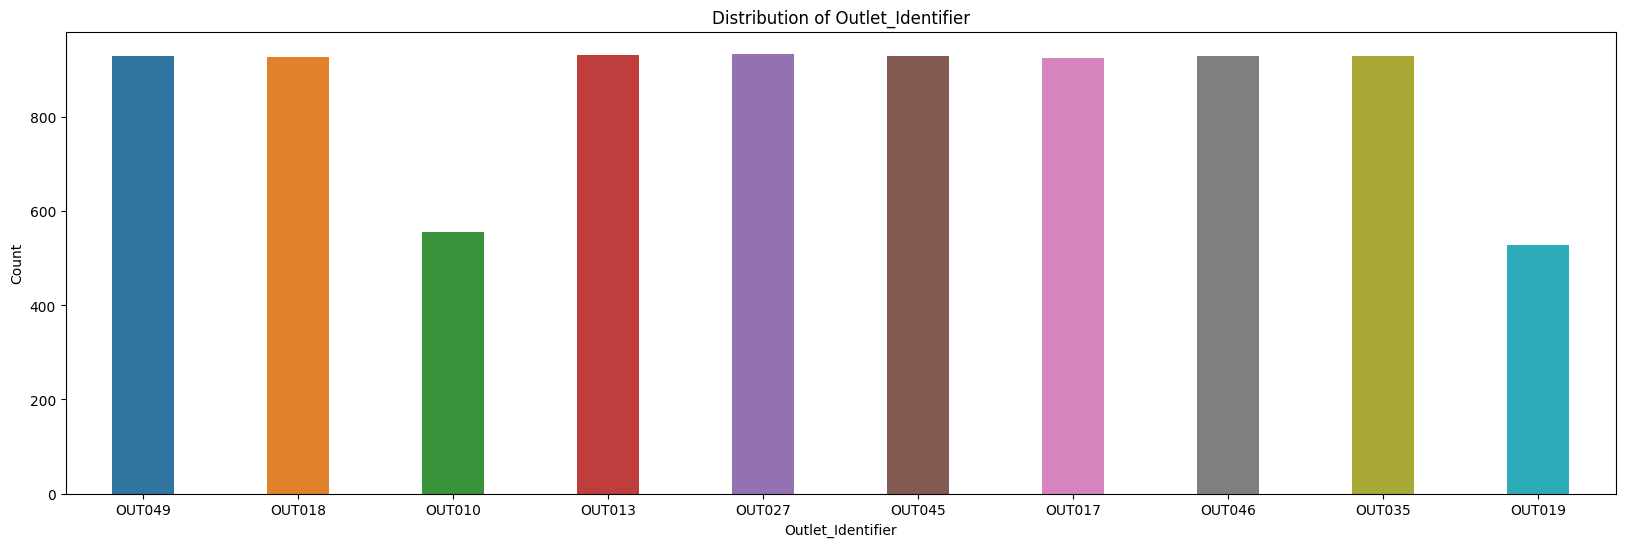

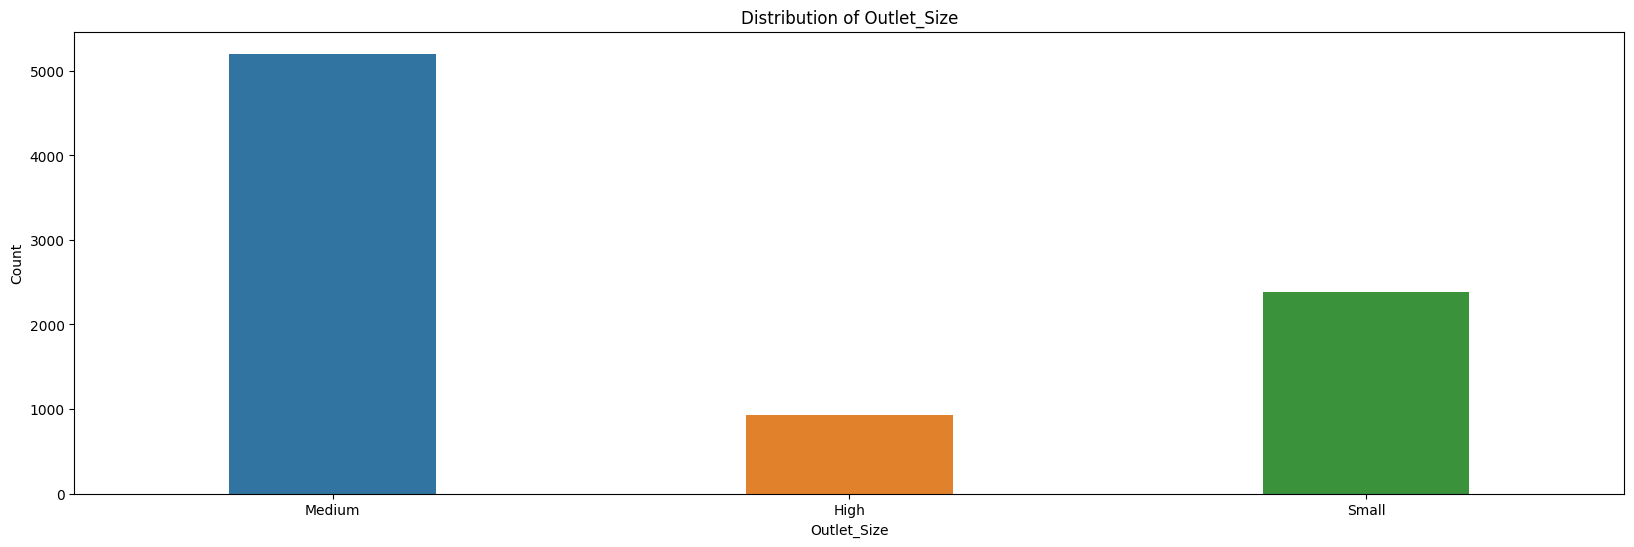

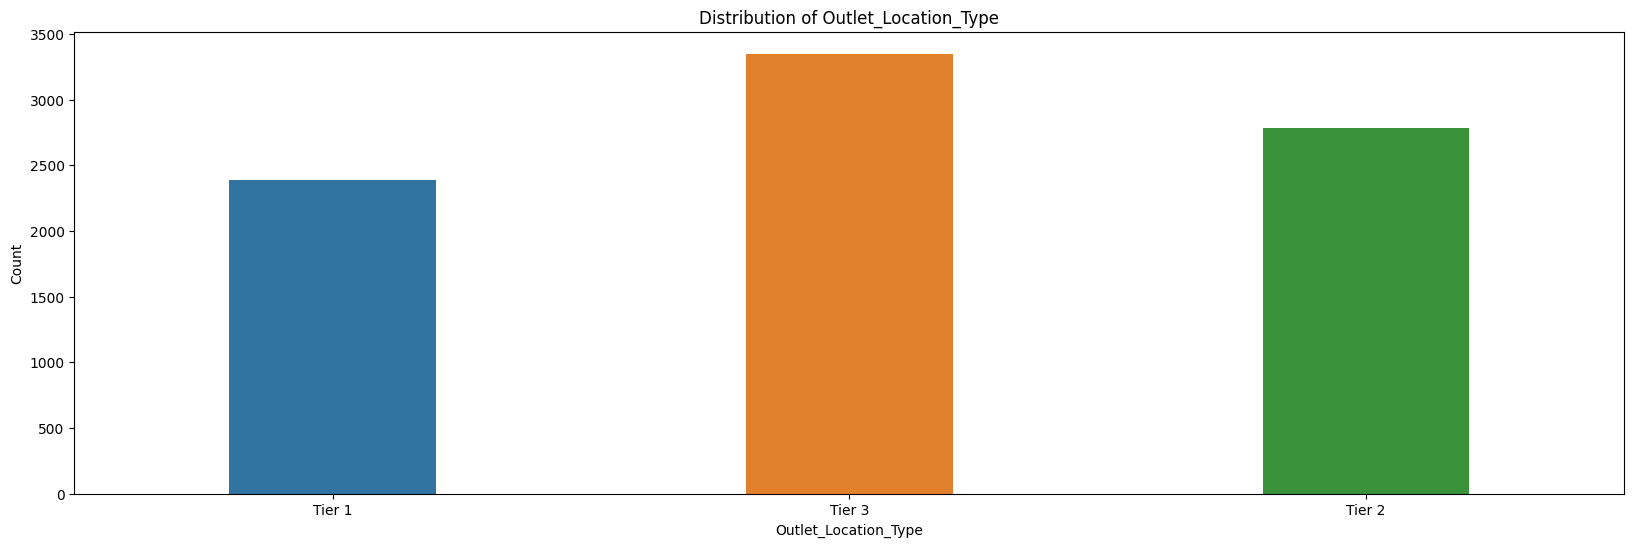

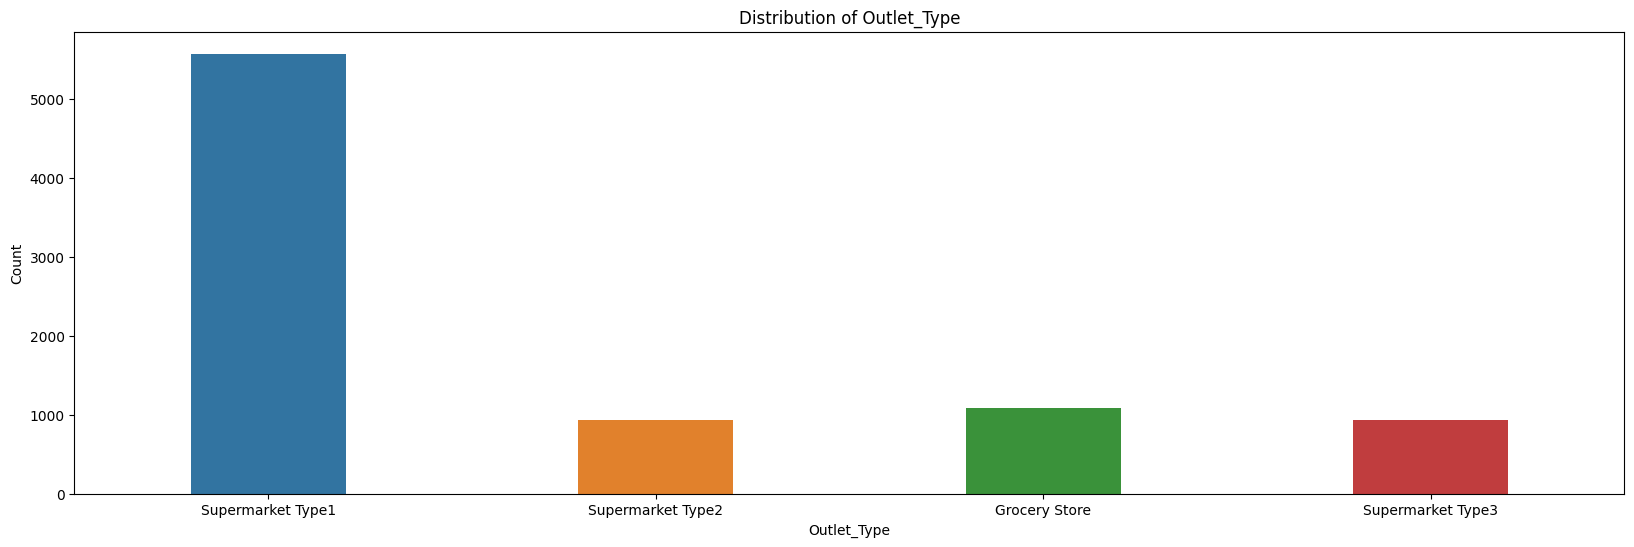

In [66]:
# Assuming 'categorical_columns' your DataFrame containing categorical features

# Define the categorical features you want to create count plots for
categorical_features = categorical_columns.columns

# Loop through each categorical feature and create individual count plots
for feature in categorical_features:
    plt.figure(figsize=(20, 6))
    sns.countplot(x=feature, data=categorical_columns, width = 0.4)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.show()


# Bivariate Analysis

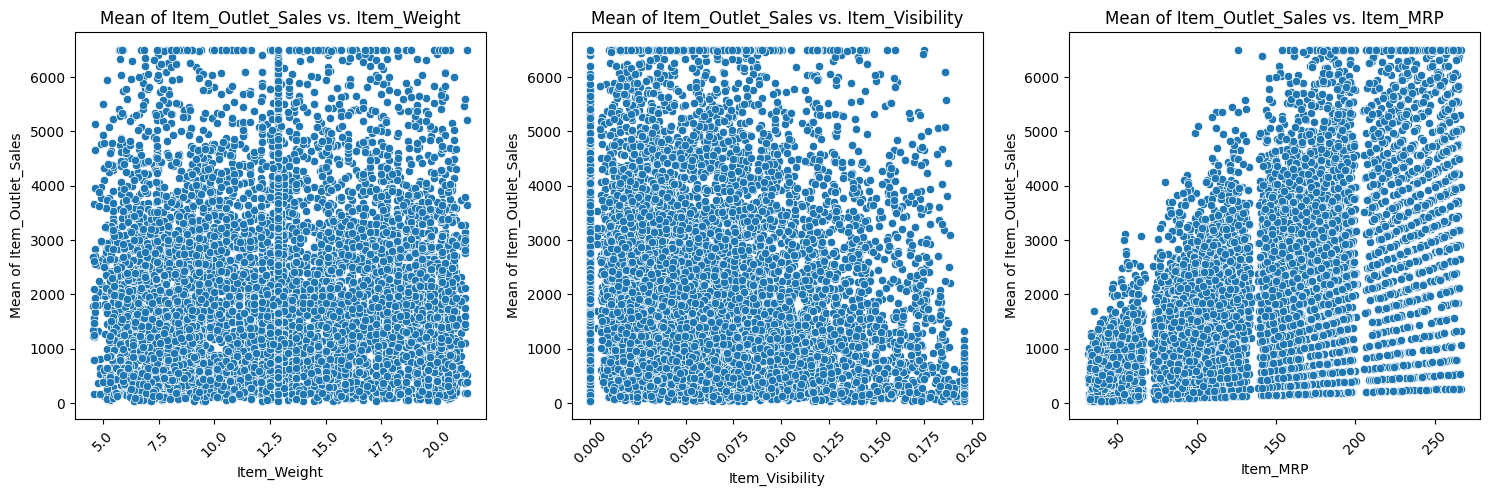

In [67]:
# Define the features you want to create scatter plots for
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Loop through each feature and create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='Item_Outlet_Sales', data=train_data, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Mean of Item_Outlet_Sales')
    axes[i].set_title(f'Mean of Item_Outlet_Sales vs. {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


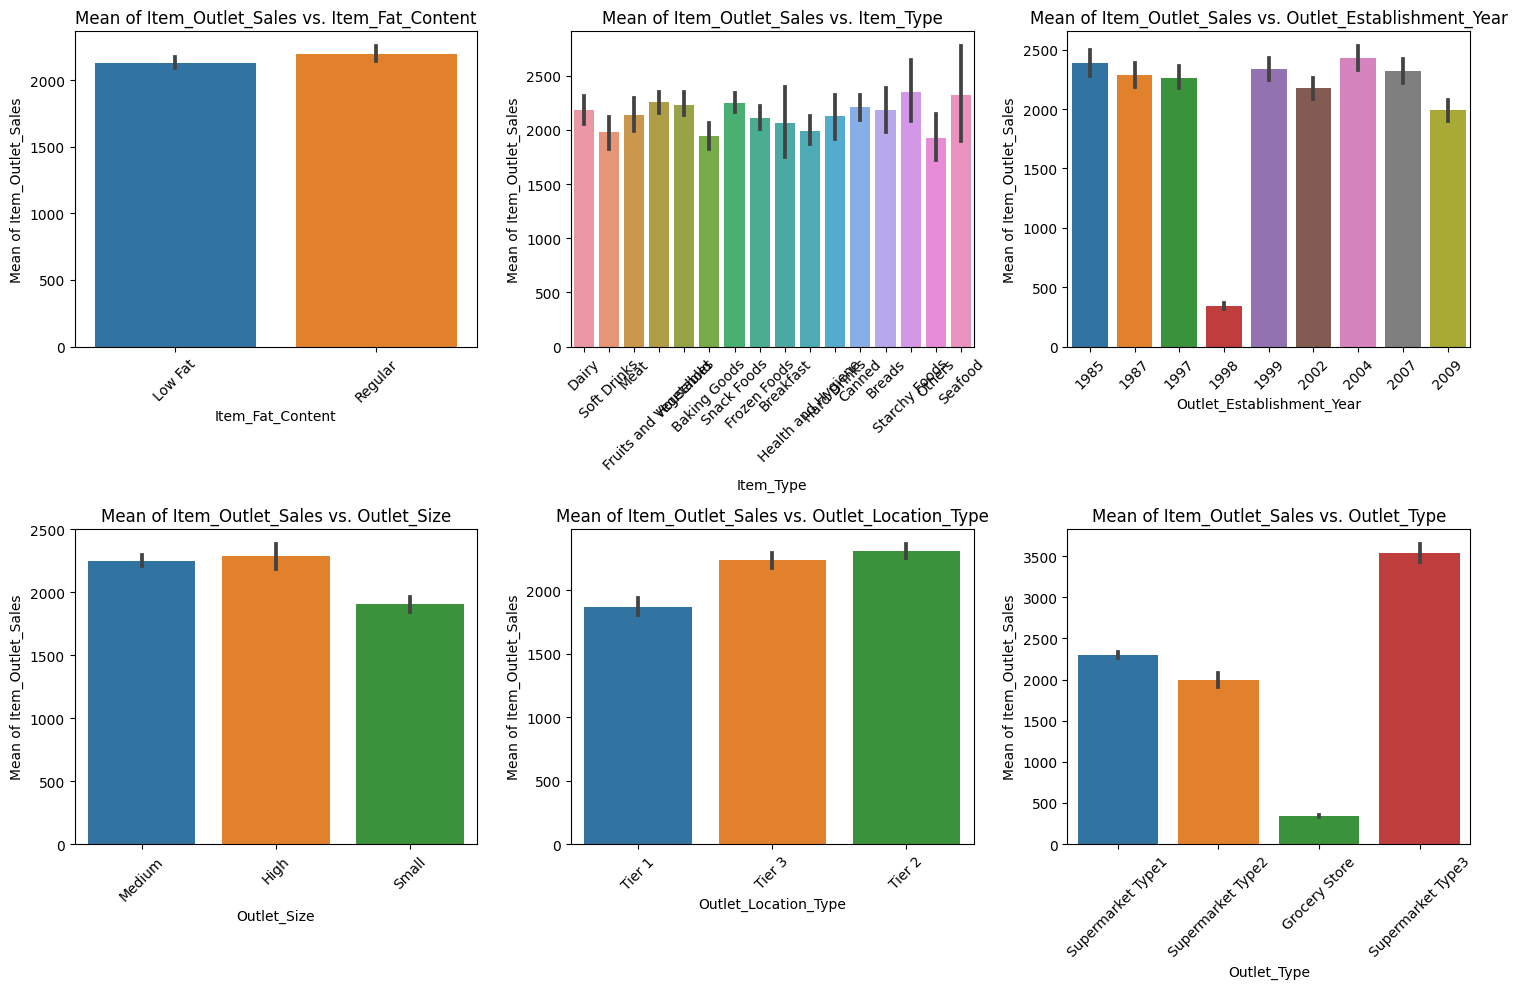

In [68]:
# Define the categorical features you want to create bar plots for
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Loop through each categorical feature and create bar plots
for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.barplot(x=feature, y='Item_Outlet_Sales', data=train_data, ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Mean of Item_Outlet_Sales')
    axes[row, col].set_title(f'Mean of Item_Outlet_Sales vs. {feature}')
    axes[row, col].tick_params(axis='x', rotation=45)

# Remove any empty subplots if there are fewer than 6 features
if len(categorical_features) < 6:
    for i in range(len(categorical_features), 6):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


# Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder

categorical_variables = categorical_columns.columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through the categorical columns and apply label encoding
for col in categorical_variables:
    train_data[col + '_encoded'] = label_encoder.fit_transform(train_data[col])

# Drop the original categorical columns if needed
train_data = train_data.drop(categorical_variables, axis=1)


In [70]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,0,4,9,1,0,1
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,1,14,3,1,2,2
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,0,10,9,1,0,1
3,FDX07,19.20,0.000000,182.0950,1998,732.3800,1,6,0,1,2,0
4,NCD19,8.93,0.000000,53.8614,1987,994.7052,0,9,1,0,2,1


# Splitting the data

In [81]:
from sklearn.model_selection import train_test_split

# Split the  data into features (X) and the target variable (y)
X = train_data.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = train_data['Item_Outlet_Sales']

# Split the data into training and testing sets (e.g., 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train contain the training data and labels.
# X_test and y_test contain the testing data and labels.


In [75]:
X_train.shape

(6818, 10)

In [73]:
X_test.shape

(1705, 10)

# Model Training

# **Linear** **Regression**

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 1164652.5842517996
R-squared (R2) Score: 0.5348807528303346


# **Random Forest**

In [76]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R2) Score: {r2_rf}")


Random Forest Mean Squared Error (MSE): 1027846.4954650798
Random Forest R-squared (R2) Score: 0.58951605427998


# **XGBoost**

In [77]:
import xgboost as xgb


# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared (R2) Score: {r2_xgb}")


XGBoost Mean Squared Error (MSE): 992584.7366234938
XGBoost R-squared (R2) Score: 0.6035982990180647


**Hyper Parameter Tuning XGB And GBR**

In [78]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2],        # Learning rate
    'max_depth': [3, 4, 5],                   # Maximum tree depth
    'min_child_weight': [1, 2, 3]             # Minimum sum of instance weight needed in a child
}

# Create GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search.best_params_

# Create a new XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_params_xgb)

# Train the best model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb_best = best_xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb_best)
r2_xgb = r2_score(y_test, y_pred_xgb_best)

print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared (R2) Score: {r2_xgb}")



XGBoost Mean Squared Error (MSE): 939691.3974600991
XGBoost R-squared (R2) Score: 0.6247219460391829


**Feature selection**

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to your data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Select the top features based on importance scores
selected_features = X_train.columns[feature_importances.argsort()[-5:][::-1]]


In [95]:
selected_features

Index(['Item_MRP', 'Outlet_Type_encoded', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year'],
      dtype='object')

In [102]:
X = train_data[selected_features]
y = train_data['Item_Outlet_Sales']

# Split the data into training and testing sets (e.g., 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Train the best model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb_best = best_xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb_best)
r2_xgb = r2_score(y_test, y_pred_xgb_best)

print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared (R2) Score: {r2_xgb}")


XGBoost Mean Squared Error (MSE): 939176.7054155101
XGBoost R-squared (R2) Score: 0.6249274950411259
